# <p style = "text-align: center"> **Image Classification of Parasitized and Uninfected Cells** </p>

This project focuses on developing a machine learning model to classify images of parasitized and uninfected cells. Using TensorFlow and Keras, I built a convolutional neural network (CNN) with data augmentation techniques to enhance the model's performance. The model achieved an accuracy of approximately 94%, demonstrating its effectiveness in distinguishing between the two types of cells. This project marks an exciting step in my data science journey, and I am eager to continue learning and improving my skills in this field.

## Example Images of Cells:
---

<center>
  
| **Parasitized Cell** | **Uninfected Cell** |
|:--------------------:|:-------------------:|
|<img src="Sample_From_Dataset\Parasitized\C33P1thinF_IMG_20150619_121102a_cell_193.png" width="300">|<img src="Sample_From_Dataset\Uninfected\C1_thinF_IMG_20150604_104722_cell_15.png" width="300">|
|<img src="Sample_From_Dataset\Parasitized\C37BP2_thinF_IMG_20150620_131423a_cell_92.png" width="300">|<img src="Sample_From_Dataset\Uninfected\C1_thinF_IMG_20150604_104919_cell_31.png" width="300">|

</center>



# Importing the necessary libraries

We will need:

- *TensorFlow and Keras*: Frameworks for building and training neural networks.

- *Conv2D, MaxPooling2D, Dense, Flatten, Dropout*: Layers commonly used in CNNs for feature detection, down-sampling, and preventing overfitting.

- *EarlyStopping*: Callback to stop training when performance stops improving.
regularizers: Techniques to prevent overfitting.

- *Matplotlib (plt)*: For plotting and visualizing data.

- *OpenCV (cv)*: For image processing tasks.

- *NumPy (np)*: For numerical operations and array handling.

These tools are essential for constructing and optimizing the CNN model in this project.

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [32]:
import os
import imghdr

data_dir = 'cell_images'

os.listdir(data_dir)

['Parasitized', 'Uninfected']

In [33]:

image_exts = ["png", "jpg", "jpeg"]

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): #will loop through each image in the directory (data_dir/image_class) i.e (cell_images/Parasitized) then (cell_images/Uninfected)
        image_path = os.path.join(data_dir, image_class, image) #will get the path of the image
        try:
            img = cv.imread(image_path) #will read the image
            img_type = imghdr.what(image_path) #will get the type of the image

            if img_type not in image_exts: #if the image type is not in the list of image_exts
                os.remove(image_path) #remove the image
                print(f"Removed {image_path}")

        except Exception as e:
            print(f"Issue with file: {image_path}")


(163, 142, 3)


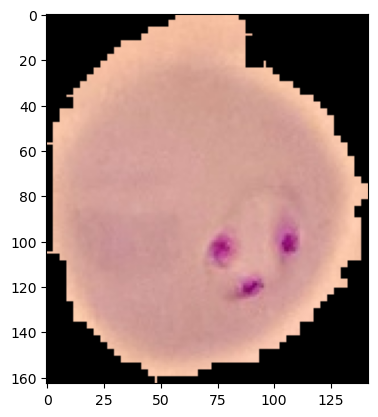

In [34]:
img = cv.imread(os.path.join(data_dir, 'Parasitized', 'C33P1thinF_IMG_20150619_114756a_cell_179.png'))
print(img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))#matplotlib uses RGB but cv2 uses BGR

plt.show()

In [35]:
# Load dataset

# This will only target in the folder, in our case, 2 subfolder and label them respectively

dataset = tf.keras.utils.image_dataset_from_directory('cell_images')

dataset_itrt =  dataset.as_numpy_iterator()
batch = dataset_itrt.next()

Found 27556 files belonging to 2 classes.


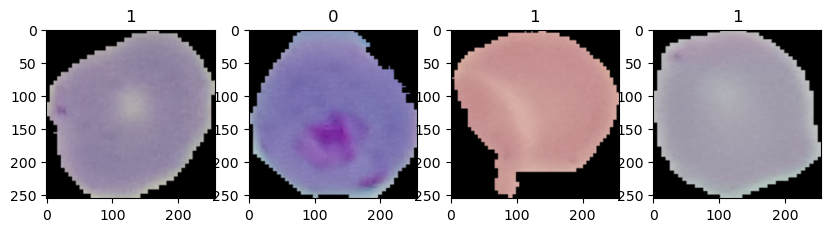

In [36]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(10,10))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [37]:
# Scaling the dataset
scaled_dataset = dataset.map(lambda x, y: (x/255, y))

In [38]:
scaled_itrt = scaled_dataset.as_numpy_iterator()

In [39]:
batch = scaled_itrt.next()

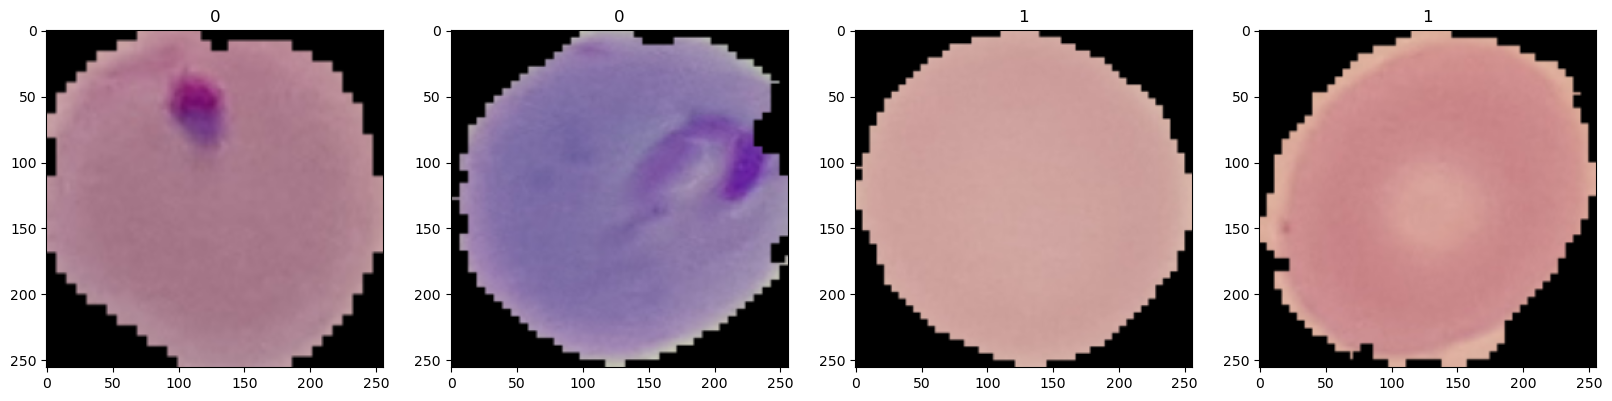

In [40]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [41]:
# Split dataset into train, validation, and test sets
batch_number = len(scaled_dataset)

In [42]:
print(batch_number)

862


In [43]:

# The model learns from the patterns and relationships present in the training data
train_size = int((0.7 * batch_number))

# After each training epoch or iteration, the model's performance is evaluated on the validation set to monitor for overfitting and determine the optimal hyperparameters
val_size = int((0.2 * batch_number))

# completely independent subset of the dataset, not used during training or hyperparameter tuning.
# The test set provides an unbiased estimate of the model's performance on unseen data.
test_size = int((0.1 * batch_number))


In [44]:
print('train_size: ', train_size)
print('val_size: ', val_size)
print('test_size: ', test_size)

train_size:  603
val_size:  172
test_size:  86


In [45]:

train_dataset = scaled_dataset.take(train_size)
val_dataset = scaled_dataset.skip(train_size).take(val_size)
test_dataset = scaled_dataset.skip(train_size + val_size).take(test_size)


In [46]:

# Data augmentation, given the nature of medical imaging
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Build model
model = Sequential([
    data_augmentation,
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])



In [47]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [51]:
# Train model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/10
603/603 [==============================] - 324s 521ms/step - loss: 0.7572 - accuracy: 0.5285 - val_loss: 0.7047 - val_accuracy: 0.5098
Epoch 2/10
603/603 [==============================] - 287s 475ms/step - loss: 0.7028 - accuracy: 0.5377 - val_loss: 0.6971 - val_accuracy: 0.5369
Epoch 3/10
603/603 [==============================] - 286s 474ms/step - loss: 0.6942 - accuracy: 0.5344 - val_loss: 0.6947 - val_accuracy: 0.5013
Epoch 4/10
603/603 [==============================] - 292s 484ms/step - loss: 0.6951 - accuracy: 0.5413 - val_loss: 0.6908 - val_accuracy: 0.5919
Epoch 5/10
603/603 [==============================] - 286s 475ms/step - loss: 0.6925 - accuracy: 0.5616 - val_loss: 0.6914 - val_accuracy: 0.5293
Epoch 6/10
603/603 [==============================] - 285s 473ms/step - loss: 0.6945 - accuracy: 0.5658 - val_loss: 0.6778 - val_accuracy: 0.6079
Epoch 7/10
603/603 [==============================] - 291s 483ms/step - loss: 0.6022 - accuracy: 0.7374 - val_loss: 0.3464 -

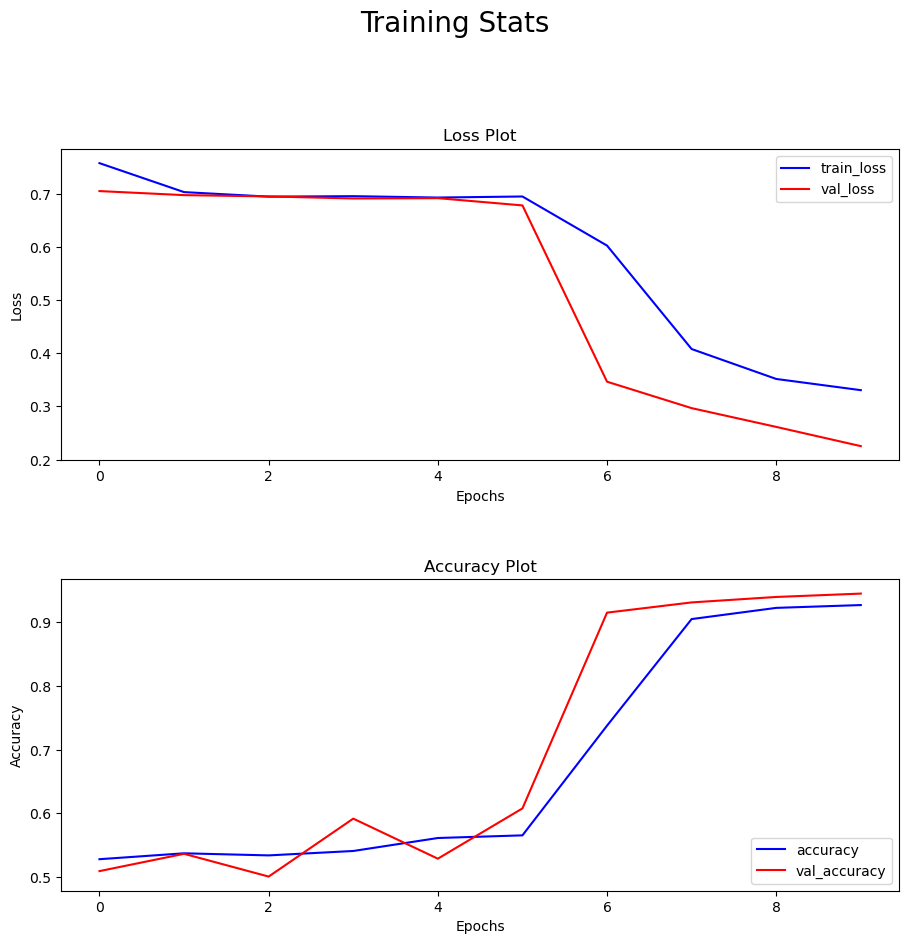

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], color='blue', label="train_loss")
ax[0].plot(history.history['val_loss'], color='red', label="val_loss")
ax[0].set(
    title = "Loss Plot",
    xlabel ="Epochs",
    ylabel = "Loss"
)
ax[0].legend(loc = "upper right")

ax[1].plot(history.history['accuracy'], color='blue', label="accuracy")
ax[1].plot(history.history['val_accuracy'], color='red', label="val_accuracy")
ax[1].set(
    title = "Accuracy Plot",
    xlabel ="Epochs",
    ylabel = "Accuracy"    
)
ax[1].legend(loc = "lower right")
fig.suptitle('Training Stats', fontsize = 20)
fig.tight_layout(pad=4)

plt.show()

In [53]:
# Save the model
model.save('malaria_classification_model.keras')
model.save('malaria_classification_model.h5')

In [54]:
# Testing the Model Prediction Accuracy

from tensorflow.keras.models import load_model


In [55]:

trained_model = load_model(r'C:\Users\LISH AI LABS\Documents\Billy_Repo\CEMA\malaria_classification_model.h5')

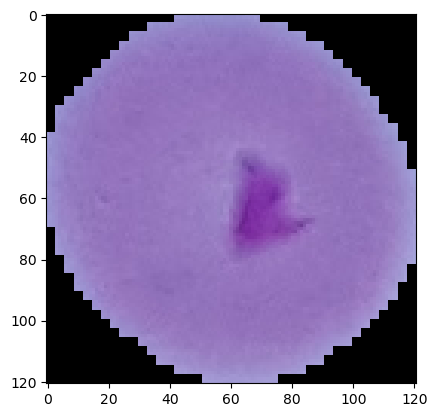

In [56]:

img = cv.imread(r'C:\Users\LISH AI LABS\Documents\Billy_Repo\CEMA\testing-samples\C38P3thinF_original_IMG_20150621_112116_cell_204.png')
plt.imshow(img)
plt.show()

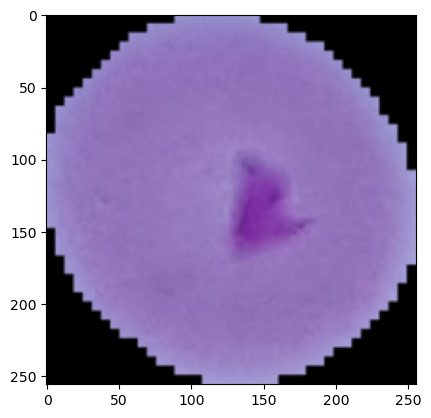

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 183ms/step


In [59]:
print(yhat)

[[0.04940681]]


In [60]:
# Display predictions
if yhat[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Parasitized


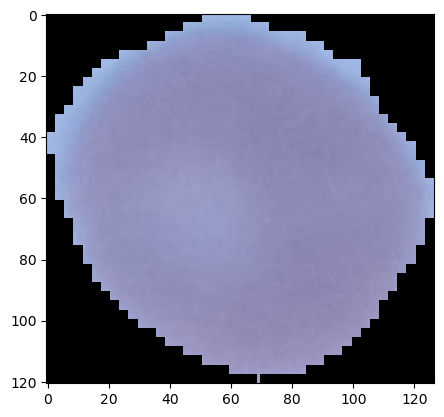

In [62]:
img2 = cv.imread(r'C:\Users\LISH AI LABS\Documents\Billy_Repo\CEMA\testing-samples\C1_thinF_IMG_20150604_104919_cell_82.png')
plt.imshow(img2)
plt.show()

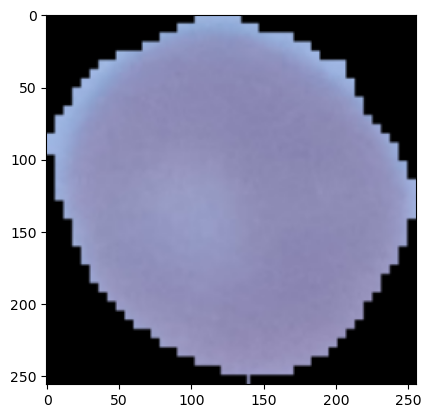

In [63]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [64]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 28ms/step


In [65]:
print(yhat2)

[[0.9755816]]


In [66]:
# Display predictions
if yhat2[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Uninfected
